In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
import joblib

import tensorflow as tf 
from tensorflow import keras
from keras_tuner import RandomSearch

In [2]:
def Data_Extract(data, thck):
    i_put = []
    o_put = []
    for key in data.keys():
        i_img = data[key]['imgs']
        o_put.append(thck[key])
        i_put.append(np.array([i_img[k] for k in range(len(i_img))]))

    i_put = np.concatenate(i_put) 
    o_put = np.concatenate(o_put) 

    target = o_put.copy()
    images = i_put.copy()
    
    images = images.reshape(len(images),32,32,1)
    images = images/255.0
    
    return(images,target)

In [3]:
data10 = pd.read_pickle('d_data_10.pkl')
thck10 = pd.read_pickle('d_thck_10.pkl')

images10, target10 = Data_Extract(data10,thck10)

In [4]:
new_data10_1 = pd.read_pickle('AA_DF000644RL_0d_data_10.pkl')
new_thck10_1 = pd.read_pickle('AA_DF000644RL_0d_thck_10.pkl')

images10_AA_D, target10_AA_D = Data_Extract(new_data10_1,new_thck10_1)

In [5]:
new_data10_2 = pd.read_pickle('1948046X_X74_DPd_data_10.pkl')
new_thck10_2 = pd.read_pickle('1948046X_X74_DPd_thck_10.pkl')

images10_1948, target10_1948 = Data_Extract(new_data10_2,new_thck10_2)

In [6]:
new_data10_3 = pd.read_pickle('1952133X_X74_DPd_data_10.pkl')
new_thck10_3 = pd.read_pickle('1952133X_X74_DPd_thck_10.pkl')

images10_1952, target10_1952 = Data_Extract(new_data10_3,new_thck10_3)

In [7]:
images10_combine = np.append(images10,images10_AA_D,axis=0)
images10_combine = np.append(images10_combine,images10_1948,axis=0)
images10_combine = np.append(images10_combine,images10_1952,axis=0)

target10_combine = np.append(target10,target10_AA_D)
target10_combine = np.append(target10_combine,target10_1948)
target10_combine = np.append(target10_combine,target10_1952)

print(images10_combine.shape,target10_combine.shape)

(86438, 32, 32, 1) (86438,)


In [12]:
for key in new_data10_1.keys():
    print(key)

AA_DF000644RL_00_SRL_2539768X_RR_TOP_ROLL_SUBSTRATE_LH


In [13]:
for key in new_data10_2.keys():
    print(key)

1948046X_X74_DP_AV_BANDEAU_SUP_THERMOGAINE_LH


In [14]:
for key in new_data10_3.keys():
    print(key)

1952133X_X74_DP_AR_BANDEAU_SUP_THERMOGAINE_LH


## Images in Matrix

In [134]:
scale = MinMaxScaler()

target10_combine_scaled = scale.fit_transform(target10_combine.reshape(-1,1))
target10_combine_scaled = target10_combine_scaled.reshape(1,-1).flatten()
print(min(target10_combine_scaled))
print(max(target10_combine_scaled))

[0.]
[1.]


In [178]:
bin1 =np.array(np.where(target10_combine_scaled<=0.2)).flatten()
bin1 = images10_combine[bin1]

bin2 = np.array(np.where((target10_combine_scaled>0.2)&(target10_combine_scaled<=0.4))).flatten()
bin2 = images10_combine[bin2]

bin3 = np.array(np.where((target10_combine_scaled>0.4)&(target10_combine_scaled<=0.6))).flatten()
bin3 = images10_combine[bin3]

bin4 = np.array(np.where((target10_combine_scaled>0.6)&(target10_combine_scaled<=0.8))).flatten()
bin4 = images10_combine[bin4]

bin5 = np.array(np.where((target10_combine_scaled>0.8)&(target10_combine_scaled<=1))).flatten()
bin5 = images10_combine[bin5]

In [183]:
bin1 = bin1[np.random.choice(len(bin1),100)]
bin2 = bin2[np.random.choice(len(bin2),100)]
bin3 = bin3[np.random.choice(len(bin3),100)]
bin4 = bin4[np.random.choice(len(bin4),100)]
bin5 = bin5[np.random.choice(len(bin5),100)]

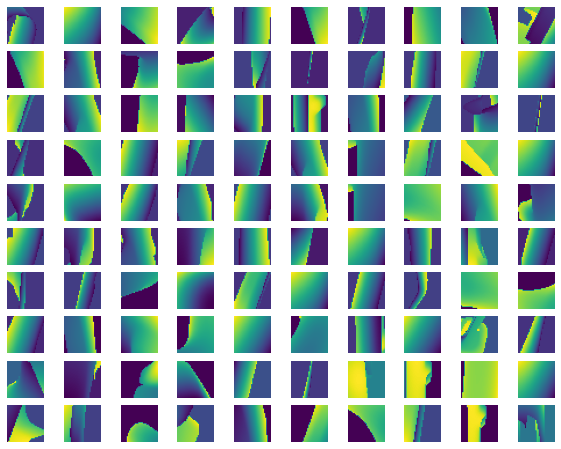

In [223]:
i = 0 
plt.figure(figsize=(10,8))
while i<100:
    plt.subplot(10,10,i+1)
    plt.imshow(bin5[i])
    plt.axis('off')
    i+=1
        
plt.show()

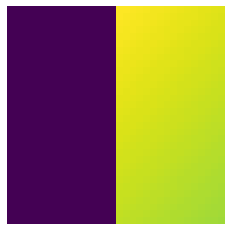

In [212]:
plt.imshow(bin1[0])
plt.axis('off')
plt.show()

## Working with new attributes 

In [8]:
extra_variables = pd.read_csv('Project_Info.csv')
extra_variables

,ID,File,OEM,Project,Commodity,Variant,Part,Skin Mtrl,Skin thk,Foam Mtrl,Foam Thk,Norm Thk,Process,MTD_X,MTD_Y,MTD_Z
0,D0001,1670177_2941632X _TESLA_MY_DR_BELTLINE_2_0_FR_LH,Tesla,MY,DP,Front,Toproll,TPO,0.5,PP,2.0,2.1,Thermo covering,0.000000,0.927184,0.374607
1,D0002,1948046X_X74_DP_AV_BANDEAU_SUP_THERMOGAINE_LH,PSA,X74,DP,Front,Toproll,PVC,0.5,PP,1.5,1.8,Thermo covering,0.000000,-0.173648,0.984808
2,D0003,1952133X_X74_DP_AR_BANDEAU_SUP_THERMOGAINE_LH,PSA,X74,DP,Rear,Toproll,PVC,0.5,PP,1.5,1.8,Thermo covering,-0.009798,0.246147,-0.969183
3,D0004,2089738X_TOP_ROLL_FRT_KISS_CUT_RH_STYLE,PSA,D34,DP,Front,Toproll,PVC,0.5,PP,1.5,1.8,Thermo covering,0.000000,0.199368,-0.979925
4,D0005,PSA_C48E_THERMOCOVERED_TOPROLL_ALLCATPART,PSA,C84E,DP,Front,Toproll,PVC,0.5,PP,2.0,2.2,Thermo covering,0.000000,1.000000,0.000000
5,D0006,2237373X_TOP_ROLL_FRT_COVRD_LH_ALLCATPART,RSA,HJB,DP,Front,Toproll,TPO2,0.5,PP,2.0,2.5,Thermo covering,0.000000,1.000000,0.000000
6,D0007,2500835X_VS11_FRT_DOOR_INSERT_ARMREST_COVERED_...,RSA,VS11,DP,Front,Armrest,TPO,1.0,PU,3.5,4.5,Press Covering,0.000000,1.000000,0.000000
7,D0008,AA_DF000644RL_00_SRL_2539768X_RR_TOP_ROLL_SUBS...,Byton,FMC,DP,Rear,Toproll,PVC,0.5,PP,2.0,1.8,Thermo covering,0.000000,1.000000,0.000000
8,D0009,FRONT_TOPROLL_SD0526A239420114_008_STYLE,PSA,C346,DP,Front,Toproll,PVC,0.5,PP,2.0,1.3,Thermo covering,0.223799,-0.596988,0.770402
9,D0010,2504639X_XFK_RR_DOOR_ASSBLD_SLIDING_TILTING_SO...,PSA,XFK,DP,Rear,Insert,Textile,0.6,PU,4.0,3.6,Press Covering,0.000000,1.000000,0.000000


In [9]:
allfiles = [data10,new_data10_1,new_data10_2,new_data10_3]
for filename in allfiles:
    for key in filename.keys():
        print(key,'-' ,len(extra_variables.loc[extra_variables['File'] == key]))

PSA_C48E_THERMOCOVERED_TOPROLL_ALLCATPART - 1
2089738X_TOP_ROLL_FRT_KISS_CUT_RH_STYLE - 1
1670177_2941632X _TESLA_MY_DR_BELTLINE_2_0_FR_LH - 1
FRONT_TOPROLL_SD0526A239420114_008_STYLE - 1
2237373X_TOP_ROLL_FRT_COVRD_LH_ALLCATPART - 1
AA_DF000644RL_00_SRL_2539768X_RR_TOP_ROLL_SUBSTRATE_LH - 1
1948046X_X74_DP_AV_BANDEAU_SUP_THERMOGAINE_LH - 1
1952133X_X74_DP_AR_BANDEAU_SUP_THERMOGAINE_LH - 1


In [10]:
def getting_attributes(filenames):
    
    extra_variables = pd.read_csv('Project_Info.csv')
    df = pd.DataFrame(columns=extra_variables.columns)
    
    for filename in filenames:   
        for key in filename.keys():
            key_len = len(filename[key]['imgs'].keys())
            df = df.append([extra_variables.loc[extra_variables['File']==key]]*key_len,ignore_index=True)
    
    return df


In [11]:
df = getting_attributes(allfiles)
del(allfiles)
print('dataframe',len(df))
len(images10_combine)

dataframe 86438


86438

In [12]:
df['Thickness']=pd.DataFrame(target10_combine)

In [13]:
df.head()

,ID,File,OEM,Project,Commodity,Variant,Part,Skin Mtrl,Skin thk,Foam Mtrl,Foam Thk,Norm Thk,Process,MTD_X,MTD_Y,MTD_Z,Thickness
0,D0005,PSA_C48E_THERMOCOVERED_TOPROLL_ALLCATPART,PSA,C84E,DP,Front,Toproll,PVC,0.5,PP,2.0,2.2,Thermo covering,0.0,1.0,0.0,1.281634
1,D0005,PSA_C48E_THERMOCOVERED_TOPROLL_ALLCATPART,PSA,C84E,DP,Front,Toproll,PVC,0.5,PP,2.0,2.2,Thermo covering,0.0,1.0,0.0,1.200343
2,D0005,PSA_C48E_THERMOCOVERED_TOPROLL_ALLCATPART,PSA,C84E,DP,Front,Toproll,PVC,0.5,PP,2.0,2.2,Thermo covering,0.0,1.0,0.0,1.300560
3,D0005,PSA_C48E_THERMOCOVERED_TOPROLL_ALLCATPART,PSA,C84E,DP,Front,Toproll,PVC,0.5,PP,2.0,2.2,Thermo covering,0.0,1.0,0.0,1.404651
4,D0005,PSA_C48E_THERMOCOVERED_TOPROLL_ALLCATPART,PSA,C84E,DP,Front,Toproll,PVC,0.5,PP,2.0,2.2,Thermo covering,0.0,1.0,0.0,1.602970


In [14]:
print(df[['Process']].value_counts())
print('\n')
print(df[['Skin Mtrl']].value_counts())
print('\n')

print(df[['OEM']].value_counts())
print('\n')

print(df[['Project']].value_counts())
print('\n')

print(df[['Commodity']].value_counts())
print('\n')

print(df[['Variant']].value_counts())
print('\n')

print(df[['Part']].value_counts())

Process        
Thermo covering    86438
dtype: int64


Skin Mtrl
PVC          62646
TPO2         15840
TPO           7952
dtype: int64


OEM  
PSA      52964
RSA      15840
Byton     9682
Tesla     7952
dtype: int64


Project
X74        23180
HJB        15840
C84E       14648
FMC         9682
D34         9520
MY          7952
C346        5616
dtype: int64


Commodity
DP           86438
dtype: int64


Variant
Front      71311
Rear       15127
dtype: int64


Part   
Toproll    86438
dtype: int64


Thickness    1.285806
dtype: float64


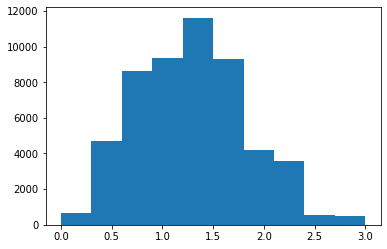

In [15]:
print(df.loc[df['OEM']=='PSA',['Thickness']].mean())
plt.hist(df.loc[df['OEM']=='PSA',['Thickness']])
plt.show()

Thickness    1.751498
dtype: float64


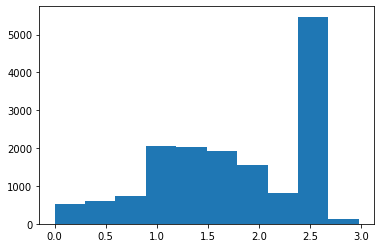

In [16]:
print(df.loc[df['OEM']=='RSA',['Thickness']].mean())
plt.hist(df.loc[df['OEM']=='RSA',['Thickness']])
plt.show()

Thickness    1.729418
dtype: float64


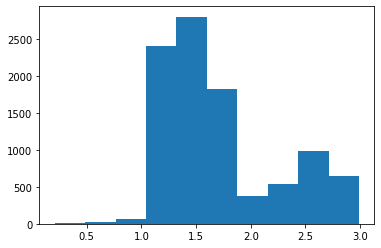

In [18]:
print(df.loc[df['OEM']=='Byton',['Thickness']].mean())
plt.hist(df.loc[df['OEM']=='Byton',['Thickness']])
plt.show()

Thickness    1.491507
dtype: float64


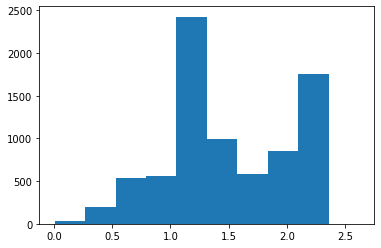

In [19]:
print(df.loc[df['OEM']=='Tesla',['Thickness']].mean())
plt.hist(df.loc[df['OEM']=='Tesla',['Thickness']])
plt.show()

In [14]:
df = df.drop(columns=['ID','File','Project','Commodity','Part','Process'])
df.head()

,OEM,Variant,Skin Mtrl,Skin thk,Foam Mtrl,Foam Thk,Norm Thk,MTD_X,MTD_Y,MTD_Z,Thickness
0,PSA,Front,PVC,0.5,PP,2.0,2.2,0.0,1.0,0.0,1.281634
1,PSA,Front,PVC,0.5,PP,2.0,2.2,0.0,1.0,0.0,1.200343
2,PSA,Front,PVC,0.5,PP,2.0,2.2,0.0,1.0,0.0,1.300560
3,PSA,Front,PVC,0.5,PP,2.0,2.2,0.0,1.0,0.0,1.404651
4,PSA,Front,PVC,0.5,PP,2.0,2.2,0.0,1.0,0.0,1.602970


In [16]:
print(df[['Skin Mtrl']].value_counts())
print('\n')
print(df[['Variant']].value_counts())
print('\n')
print(df[['Foam Mtrl']].value_counts())
print('\n')
print(df[['OEM']].value_counts())

Skin Mtrl
PVC          62646
TPO2         15840
TPO           7952
dtype: int64


Variant
Front      71311
Rear       15127
dtype: int64


Foam Mtrl
PP           86438
dtype: int64


OEM  
PSA      52964
RSA      15840
Byton     9682
Tesla     7952
dtype: int64


In [17]:
df = pd.get_dummies(df)
df

,Skin thk,Foam Thk,Norm Thk,MTD_X,MTD_Y,MTD_Z,Thickness,OEM_Byton,OEM_PSA,OEM_RSA,OEM_Tesla,Variant_Front,Variant_Rear,Skin Mtrl_PVC,Skin Mtrl_TPO,Skin Mtrl_TPO2,Foam Mtrl_PP
0,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.281634,0,1,0,0,1,0,1,0,0,1
1,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.200343,0,1,0,0,1,0,1,0,0,1
2,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.300560,0,1,0,0,1,0,1,0,0,1
3,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.404651,0,1,0,0,1,0,1,0,0,1
4,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.602970,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86433,0.5,1.5,1.8,-0.009798,0.246147,-0.969183,0.939436,0,1,0,0,0,1,1,0,0,1
86434,0.5,1.5,1.8,-0.009798,0.246147,-0.969183,1.105126,0,1,0,0,0,1,1,0,0,1
86435,0.5,1.5,1.8,-0.009798,0.246147,-0.969183,1.099450,0,1,0,0,0,1,1,0,0,1
86436,0.5,1.5,1.8,-0.009798,0.246147,-0.969183,0.939475,0,1,0,0,0,1,1,0,0,1


In [18]:
df = df.drop(columns =['Variant_Rear','Skin Mtrl_TPO','Foam Mtrl_PP','OEM_Tesla'])
df= df[['Variant_Front', 'Skin Mtrl_PVC', 'Skin Mtrl_TPO2','OEM_PSA','OEM_RSA','OEM_Byton','Skin thk','Foam Thk', 'Norm Thk','MTD_X', 'MTD_Y', 'MTD_Z','Thickness']]
df

,Variant_Front,Skin Mtrl_PVC,Skin Mtrl_TPO2,OEM_PSA,OEM_RSA,OEM_Byton,Skin thk,Foam Thk,Norm Thk,MTD_X,MTD_Y,MTD_Z,Thickness
0,1,1,0,1,0,0,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.281634
1,1,1,0,1,0,0,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.200343
2,1,1,0,1,0,0,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.300560
3,1,1,0,1,0,0,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.404651
4,1,1,0,1,0,0,0.5,2.0,2.2,0.000000,1.000000,0.000000,1.602970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86433,0,1,0,1,0,0,0.5,1.5,1.8,-0.009798,0.246147,-0.969183,0.939436
86434,0,1,0,1,0,0,0.5,1.5,1.8,-0.009798,0.246147,-0.969183,1.105126
86435,0,1,0,1,0,0,0.5,1.5,1.8,-0.009798,0.246147,-0.969183,1.099450
86436,0,1,0,1,0,0,0.5,1.5,1.8,-0.009798,0.246147,-0.969183,0.939475


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 

In [35]:
Vif = pd.DataFrame()
Vif['Attributes'] = df.iloc[:,:-2].columns
Vif['vif'] = [vif(df.values,i) for i in range(len(df.iloc[:,:-2].columns))]
Vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Attributes,vif
0,Variant_Front,3.790144e+06
1,Skin Mtrl_PVC,1.306830e+06
2,Skin Mtrl_TPO2,7.867237e+11
3,OEM_PSA,2.054851e+07
4,OEM_RSA,2.267959e+11
5,OEM_Byton,5.782742e+11
6,Skin thk,0.000000e+00
7,Foam Thk,1.234434e+06
8,Norm Thk,2.142695e+06
9,MTD_X,7.820446e+10


<AxesSubplot:>

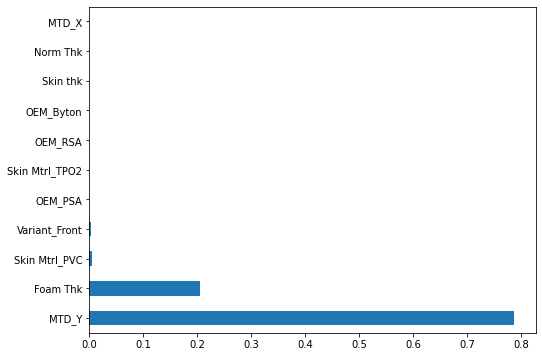

In [39]:
from xgboost import XGBRegressor

fs = XGBRegressor()
fs.fit(df.iloc[:,:-2],df.iloc[:,-1])

featire_imp= pd.Series(fs.feature_importances_ , index= df.iloc[:,:-2].columns)
plt.figure(figsize=(8, 6))
featire_imp.nlargest(30).plot(kind='barh')

## Train and Test Data 

In [19]:
x_train_images,x_test_images,x_train_data,x_test_data = train_test_split(images10_combine,df, test_size=0.2, random_state=2 )

In [20]:
# array([[[ 0.08144591],
#         [ 0.07719549],
#         [ 0.07348867]

x_train_images[0]

array([[[ 0.08144591],
        [ 0.07719549],
        [ 0.07348867],
        ...,
        [-0.01844153],
        [-0.02176069],
        [-0.02505744]],

       [[ 0.07932142],
        [ 0.07514998],
        [ 0.0715787 ],
        ...,
        [-0.01993711],
        [-0.02323387],
        [-0.02653062]],

       [[ 0.07719694],
        [ 0.07324001],
        [ 0.06966873],
        ...,
        [-0.02141029],
        [-0.02470705],
        [-0.0280038 ]],

       ...,

       [[ 0.02410976],
        [ 0.0209726 ],
        [ 0.01783545],
        ...,
        [-0.06300387],
        [-0.06575792],
        [-0.06851471]],

       [[ 0.02218214],
        [ 0.01904498],
        [ 0.01590783],
        ...,
        [-0.06457276],
        [-0.06732955],
        [-0.07008634]],

       [[ 0.02025452],
        [ 0.01709876],
        [ 0.01393712],
        ...,
        [-0.06614439],
        [-0.06890118],
        [-0.07159613]]])

In [21]:
y_train_thck = pd.DataFrame(x_train_data['Thickness'])
y_test_thck = pd.DataFrame(x_test_data['Thickness'])
x_train_data = x_train_data.iloc[:,0:-1]
x_test_data = x_test_data.iloc[:,0:-1]

In [231]:
x_train_data.shape

(69150, 9)

## Model1

In [224]:
model1 = keras.Sequential([
    keras.layers.Conv2D(filters = 96,kernel_size = (5,5), activation ='relu',input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)), 
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters = 176, kernel_size=(3,3), activation ='relu'),
    keras.layers.MaxPooling2D((2,2)), 
    keras.layers.Dropout(0.2),
    
#     keras.layers.Conv2D(filters = 48, kernel_size=(3,3), activation ='relu'),
#     keras.layers.MaxPooling2D((2,2)), 
#     keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(240,activation='relu'),#256
    keras.layers.Dense(160,activation='relu'),
    keras.layers.Dense(176,activation='relu'),
    keras.layers.Dense(1, activation= 'relu')])

model1.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

In [44]:
model1.fit(x_train_1,y_train_1,epochs=10)

Epoch 1/10
  86/2161 [>.............................] - ETA: 4:05 - loss: 0.1757 - mean_squared_error: 0.0789

KeyboardInterrupt: 

In [45]:
model1.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 16s 30ms/step - loss: 0.1589 - mean_squared_error: 0.0670


[0.1588856428861618, 0.06703495234251022]

In [46]:
model1.fit(x_train_1,y_train_1,epochs=20, initial_epoch =10)

Epoch 11/20
  90/2161 [>.............................] - ETA: 4:38 - loss: 0.1816 - mean_squared_error: 0.0873

KeyboardInterrupt: 

In [47]:
model1.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 18s 33ms/step - loss: 0.1651 - mean_squared_error: 0.07234s - loss: 0.1662 - mean_s - ETA: 4s - loss: 0.1665 - me - ETA: 1s - loss: 0.1652  - ETA: 0s - loss: 0.1650 - mean_squared


[0.16512984037399292, 0.0723496675491333]

In [231]:
model1.save('NewData10_0.20')

INFO:tensorflow:Assets written to: NewData10_0.20\assets


In [10]:
model1 = keras.models.load_model('NewData10_0.20')

In [11]:
model1.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 12s 21ms/step - loss: 0.1672 - mean_squared_error: 0.0731


[0.167168527841568, 0.07305897027254105]

In [48]:
model1.evaluate(x_train_1,y_train_1)

2161/2161 [==============================] - 62s 29ms/step - loss: 0.1638 - mean_squared_error: 0.0721


[0.16383397579193115, 0.07210865616798401]

In [49]:
y_pred = model1.predict(x_test_1)
y_pred

array([[1.4912956],
       [1.2715137],
       [0.7059757],
       ...,
       [2.5176363],
       [0.3590509],
       [1.5001743]], dtype=float32)

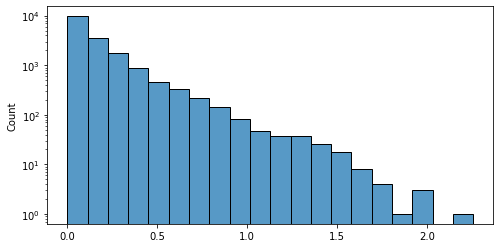

In [50]:
error = y_test_1.reshape(-1,1)-y_pred
error = error.reshape(1,-1).flatten()
plt.figure(figsize=(8,4))
sns.histplot(abs(error),bins =20)
plt.yscale('log')
plt.show()

In [24]:
len(y_test_1)

17288

In [51]:
print('MAE less than "0.1"',np.array(np.where(error<=0.1)).flatten().shape)
print('MAE less than "0.5"',np.array(np.where(error<=0.5)).flatten().shape)
print('MAE greater than "0.5" but less than "1"',np.array(np.where( (error<=1) &(error>0.5) )).flatten().shape)
print('MAE greater than "1" but less than "1.5"',np.array(np.where( (error<=1.5) &(error>1) )).flatten().shape)
print('MAE greater than "1.5" but less than "2"',np.array(np.where( (error<=2) &(error>1.5) )).flatten().shape)
print('MAE greater than "2" but less than "3"',np.array(np.where( (error<=2.5) &(error>2) )).flatten().shape)

MAE less than "0.1" (13589,)
MAE less than "0.5" (16750,)
MAE greater than "0.5" but less than "1" (432,)
MAE greater than "1" but less than "1.5" (85,)
MAE greater than "1.5" but less than "2" (20,)
MAE greater than "2" but less than "3" (1,)


## Model 2 

In [54]:
model2 = keras.Sequential([
    keras.layers.Conv2D(filters = 144,kernel_size = (5,5), activation ='relu',input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)), 
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters = 176, kernel_size=(3,3), activation ='relu'),
    keras.layers.MaxPooling2D((2,2)), 
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(240,activation='relu'),#256
    keras.layers.Dense(160,activation='relu'),
    keras.layers.Dense(176,activation='relu'),
    keras.layers.Dense(1, activation= 'relu')])

model2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

In [55]:
model2.fit(x_train_1,y_train_1,epochs=10)

Epoch 1/10
2161/2161 [==============================] - 364s 168ms/step - loss: 0.4535 - mean_squared_error: 0.3390
Epoch 2/10
2161/2161 [==============================] - 317s 147ms/step - loss: 0.3713 - mean_squared_error: 0.2495
Epoch 3/10
2161/2161 [==============================] - 300s 139ms/step - loss: 0.3293 - mean_squared_error: 0.2084
Epoch 4/10
2161/2161 [==============================] - 305s 141ms/step - loss: 0.2992 - mean_squared_error: 0.1816
Epoch 5/10
2161/2161 [==============================] - 323s 149ms/step - loss: 0.2779 - mean_squared_error: 0.1619
Epoch 6/10
2161/2161 [==============================] - 317s 147ms/step - loss: 0.2623 - mean_squared_error: 0.1476
Epoch 7/10
2161/2161 [==============================] - 356s 165ms/step - loss: 0.2491 - mean_squared_error: 0.1361
Epoch 8/10
2161/2161 [==============================] - 355s 164ms/step - loss: 0.2378 - mean_squared_error: 0.1269
Epoch 9/10
2161/2161 [==============================] - 353s 163ms/step 

In [56]:
model2.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 17s 31ms/step - loss: 0.2378 - mean_squared_error: 0.1349


[0.23784460127353668, 0.13490094244480133]

In [57]:
model2.fit(x_train_1,y_train_1,epochs=20,initial_epoch=10)

Epoch 11/20
2161/2161 [==============================] - 323s 149ms/step - loss: 0.2123 - mean_squared_error: 0.1057
Epoch 12/20
2161/2161 [==============================] - 364s 169ms/step - loss: 0.2054 - mean_squared_error: 0.1010
Epoch 13/20
2161/2161 [==============================] - 365s 169ms/step - loss: 0.2005 - mean_squared_error: 0.0970
Epoch 14/20
2161/2161 [==============================] - 357s 165ms/step - loss: 0.1956 - mean_squared_error: 0.0936
Epoch 15/20
2161/2161 [==============================] - 350s 162ms/step - loss: 0.1920 - mean_squared_error: 0.0913
Epoch 16/20
2161/2161 [==============================] - 364s 169ms/step - loss: 0.1876 - mean_squared_error: 0.0874
Epoch 17/20
2161/2161 [==============================] - 338s 157ms/step - loss: 0.1836 - mean_squared_error: 0.0838
Epoch 18/20
2161/2161 [==============================] - 309s 143ms/step - loss: 0.1797 - mean_squared_error: 0.0818
Epoch 19/20
2161/2161 [==============================] - 308s 14

In [58]:
model2.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 17s 32ms/step - loss: 0.2006 - mean_squared_error: 0.1033


[0.2005997598171234, 0.10333998501300812]

In [60]:
y_pred = model2.predict(x_test_1)
y_pred

array([[1.5233406 ],
       [1.8907539 ],
       [0.68661004],
       ...,
       [2.5428696 ],
       [0.38522524],
       [0.97506696]], dtype=float32)

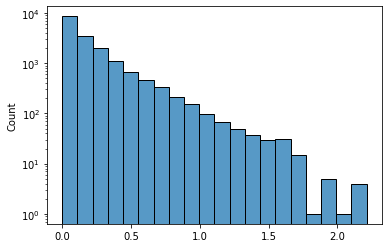

In [72]:
difference = y_test_1.reshape(-1,1)- y_pred
difference = difference.reshape(1,-1).flatten()
sns.histplot(abs(difference),bins = 20)
plt.yscale('log')
plt.show()

In [73]:
print('MAE less than "0.1"',np.array(np.where(difference<=0.1)).flatten().shape)
print('MAE less than "0.5"',np.array(np.where(difference<=0.5)).flatten().shape)
print('MAE greater than "0.5" but less than "1"',np.array(np.where( (difference<=1) &(difference>0.5) )).flatten().shape)
print('MAE greater than "1" but less than "1.5"',np.array(np.where( (difference<=1.5) &(difference>1) )).flatten().shape)
print('MAE greater than "1.5" but less than "2"',np.array(np.where( (difference<=2) &(difference>1.5) )).flatten().shape)
print('MAE greater than "2" but less than "3"',np.array(np.where( (difference<=3) &(difference>2) )).flatten().shape)

MAE less than "0.1" (13078,)
MAE less than "0.5" (16458,)
MAE greater than "0.5" but less than "1" (660,)
MAE greater than "1" but less than "1.5" (133,)
MAE greater than "1.5" but less than "2" (34,)
MAE greater than "2" but less than "3" (3,)


In [74]:
max(difference)

2.212350589168274

In [ ]:
# SAve the model 

## MOdel 3 

In [ ]:
#96
#176
#240

In [79]:
model3 = keras.Sequential([
    keras.layers.Conv2D(filters = 192,kernel_size = (5,5), activation ='relu',input_shape=(32,32,1)), 
    keras.layers.MaxPooling2D((2,2)), 
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(filters = 352, kernel_size=(3,3), activation ='relu'),
    keras.layers.MaxPooling2D((2,2)), 
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(480,activation='relu'),
    keras.layers.Dense(160,activation='relu'),
    keras.layers.Dense(176,activation='relu'),
    keras.layers.Dense(1, activation= 'relu')])

model3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

In [80]:
model3.fit(x_train_1,y_train_1,epochs=10)

Epoch 1/10
2161/2161 [==============================] - 692s 320ms/step - loss: 0.4450 - mean_squared_error: 0.3274
Epoch 2/10
2161/2161 [==============================] - 725s 335ms/step - loss: 0.3591 - mean_squared_error: 0.2376
Epoch 3/10
2161/2161 [==============================] - 663s 307ms/step - loss: 0.3094 - mean_squared_error: 0.1897
Epoch 4/10
2161/2161 [==============================] - 698s 323ms/step - loss: 0.2794 - mean_squared_error: 0.1642
Epoch 5/10
2161/2161 [==============================] - 662s 306ms/step - loss: 0.2566 - mean_squared_error: 0.1438
Epoch 6/10
2161/2161 [==============================] - 726s 336ms/step - loss: 0.2401 - mean_squared_error: 0.1295
Epoch 7/10
2161/2161 [==============================] - 732s 339ms/step - loss: 0.2269 - mean_squared_error: 0.1190
Epoch 8/10
2161/2161 [==============================] - 687s 318ms/step - loss: 0.2161 - mean_squared_error: 0.1102
Epoch 9/10
2161/2161 [==============================] - 630s 291ms/step 

In [81]:
model3.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 44s 82ms/step - loss: 0.2187 - mean_squared_error: 0.1175


[0.2186780422925949, 0.11747456341981888]

In [82]:
model3.fit(x_train_1,y_train_1,epochs=20,initial_epoch = 10)

Epoch 11/20
2161/2161 [==============================] - 653s 302ms/step - loss: 0.1901 - mean_squared_error: 0.0897
Epoch 12/20
2161/2161 [==============================] - 624s 289ms/step - loss: 0.1845 - mean_squared_error: 0.0858
Epoch 13/20
2161/2161 [==============================] - 679s 314ms/step - loss: 0.1785 - mean_squared_error: 0.0813
Epoch 14/20
2161/2161 [==============================] - 633s 293ms/step - loss: 0.1736 - mean_squared_error: 0.0787
Epoch 15/20
2161/2161 [==============================] - 633s 293ms/step - loss: 0.1692 - mean_squared_error: 0.0752
Epoch 16/20
2161/2161 [==============================] - 688s 318ms/step - loss: 0.1654 - mean_squared_error: 0.0727
Epoch 17/20
2161/2161 [==============================] - 612s 283ms/step - loss: 0.1613 - mean_squared_error: 0.0693
Epoch 18/20
2161/2161 [==============================] - 707s 327ms/step - loss: 0.1588 - mean_squared_error: 0.0677
Epoch 19/20
2161/2161 [==============================] - 738s 34

In [83]:
model3.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 41s 76ms/step - loss: 0.1962 - mean_squared_error: 0.1000


[0.19623124599456787, 0.10003992915153503]

In [84]:
y_pred_3 = model3.predict(x_test_1)
y_pred_3

array([[1.5023911 ],
       [1.314765  ],
       [0.7058426 ],
       ...,
       [2.6236212 ],
       [0.32967535],
       [0.79158235]], dtype=float32)

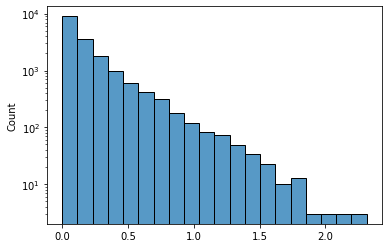

In [85]:
difference_3 = y_test_1.reshape(-1,1)- y_pred_3
difference_3 = difference_3.reshape(1,-1).flatten()
sns.histplot(abs(difference_3),bins = 20)
plt.yscale('log')
plt.show()

In [87]:
print('MAE less than "0.1"',np.array(np.where(difference_3<=0.1)).flatten().shape)
print('MAE less than "0.5"',np.array(np.where(difference_3<=0.5)).flatten().shape)
print('MAE greater than "0.5" but less than "1"',np.array(np.where( (difference_3<=1) &(difference_3>0.5) )).flatten().shape)
print('MAE greater than "1" but less than "1.5"',np.array(np.where( (difference_3<=1.5) &(difference_3>1) )).flatten().shape)
print('MAE greater than "1.5" but less than "2"',np.array(np.where( (difference_3<=2) &(difference_3>1.5) )).flatten().shape)
print('MAE greater than "2" but less than "3"',np.array(np.where( (difference_3<=2.5) &(difference_3>2) )).flatten().shape)

MAE less than "0.1" (13085,)
MAE less than "0.5" (16504,)
MAE greater than "0.5" but less than "1" (609,)
MAE greater than "1" but less than "1.5" (139,)
MAE greater than "1.5" but less than "2" (28,)
MAE greater than "2" but less than "3" (8,)


In [88]:
#model3.save('Data10Combined_model3')

INFO:tensorflow:Assets written to: Data10Combined_model3\assets


## model3 functional api plus external attributes 

In [44]:
Input1 = keras.layers.Input(shape=(32,32,1))
Input2 = keras.layers.Input(shape =(12,))

#Filter 1 
Conv1 = keras.layers.Conv2D(192, kernel_size=(5,5), activation ='relu')(Input1)
maxpooling1 = keras.layers.MaxPool2D((2,2))(Conv1)
dropout1 = keras.layers.Dropout(0.2)(maxpooling1)

Conv2 = keras.layers.Conv2D(352, kernel_size=(3,3), activation ='relu')(dropout1)
maxpooling2 = keras.layers.MaxPool2D((2,2))(Conv2)
dropout2= keras.layers.Dropout(0.2)(maxpooling2)

flatten1 = keras.layers.Flatten()(dropout2)

# Dense Layer for other attributes 
D1 = keras.layers.Dense(200, activation = 'relu')(Input2)
D2 = keras.layers.Dense(100, activation = 'relu')(D1)
#dp1= keras.layers.Dropout(0.2)(D2)
ot = keras.layers.Dense(10, activation = 'relu')(D2)


#merge 
merge = keras.layers.concatenate([flatten1,ot])

# Dense Layers 
Dense1 = keras.layers.Dense(480, activation = 'relu')(merge)
#dropout3= keras.layers.Dropout(0.2)(Dense1)
Dense2 = keras.layers.Dense(160, activation = 'relu')(Dense1)
Dense3 = keras.layers.Dense(176, activation = 'relu')(Dense2)
#Dropout4 = keras.layers.Dropout(0.2)(Dense3)
output = keras.layers.Dense(1, activation = 'relu')(Dense3)

model_func_api = keras.Model(inputs = [Input1,Input2],outputs = output)

model_func_api.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

model_func_api.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 192)  4992        ['input_12[0][0]']               
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 14, 14, 192)  0          ['conv2d_6[0][0]']               
                                                                                                  
 dropout_6 (Dropout)            (None, 14, 14, 192)  0           ['max_pooling2d_6[0][0]']        
                                                                                            

In [45]:
model_func_api.fit([x_train_images,x_train_data],y_train_thck,epochs =10)

Epoch 1/10
2161/2161 [==============================] - 639s 295ms/step - loss: 0.3599 - mean_squared_error: 0.2290
Epoch 2/10
2161/2161 [==============================] - 680s 314ms/step - loss: 0.2674 - mean_squared_error: 0.1470
Epoch 3/10
2161/2161 [==============================] - 731s 338ms/step - loss: 0.2307 - mean_squared_error: 0.1182
Epoch 4/10
2161/2161 [==============================] - 631s 292ms/step - loss: 0.2041 - mean_squared_error: 0.0982
Epoch 5/10
2161/2161 [==============================] - 624s 289ms/step - loss: 0.1867 - mean_squared_error: 0.0858
Epoch 6/10
2161/2161 [==============================] - 628s 290ms/step - loss: 0.1743 - mean_squared_error: 0.0766
Epoch 7/10
2161/2161 [==============================] - 625s 289ms/step - loss: 0.1646 - mean_squared_error: 0.0703
Epoch 8/10
2161/2161 [==============================] - 681s 315ms/step - loss: 0.1561 - mean_squared_error: 0.0647
Epoch 9/10
2161/2161 [==============================] - 725s 335ms/step 

In [46]:
model_func_api.evaluate([x_test_images,x_test_data],y_test_thck)

541/541 [==============================] - 39s 71ms/step - loss: 0.1611 - mean_squared_error: 0.0715


[0.1610921323299408, 0.07146190106868744]

In [67]:
model_func_api.fit([x_train_images,x_train_data],y_train_thck,epochs =15,initial_epoch=10)

Epoch 11/15
2161/2161 [==============================] - 718s 332ms/step - loss: 0.1395 - mean_squared_error: 0.0550
Epoch 12/15
2161/2161 [==============================] - 717s 332ms/step - loss: 0.1358 - mean_squared_error: 0.0526
Epoch 13/15
2161/2161 [==============================] - 718s 332ms/step - loss: 0.1333 - mean_squared_error: 0.0510
Epoch 14/15
2161/2161 [==============================] - 719s 333ms/step - loss: 0.1286 - mean_squared_error: 0.0484
Epoch 15/15
2161/2161 [==============================] - 658s 304ms/step - loss: 0.1264 - mean_squared_error: 0.0473


In [68]:
model_func_api.evaluate([x_test_images,x_test_data],y_test_thck)

541/541 [==============================] - 36s 67ms/step - loss: 0.1524 - mean_squared_error: 0.0616


[0.15239307284355164, 0.061636894941329956]

In [69]:
y_pred_thck = model_func_api.predict([x_test_images,x_test_data])
y_pred_thck

array([[1.6697097 ],
       [1.9022076 ],
       [0.70145816],
       ...,
       [2.4632542 ],
       [0.16634607],
       [1.315175  ]], dtype=float32)

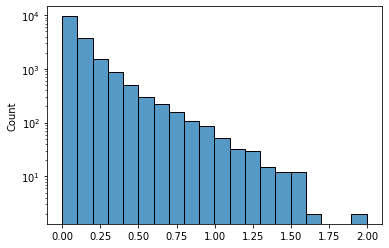

In [70]:
difference_3_api = (np.array(y_test_thck)- y_pred_thck).reshape(1,-1).flatten()
sns.histplot(abs(difference_3_api),bins = 20)
plt.yscale('log')
plt.show()

In [71]:
difference_3_api = abs(difference_3_api)
print('MAE less than "0.1"',np.array(np.where(difference_3_api<=0.1)).flatten().shape)
print('MAE less than "0.2"',np.array(np.where( (difference_3_api>0.1) & (difference_3_api<=0.2) ) ).flatten().shape)
print('MAE less than "0.5"',np.array(np.where(difference_3_api<=0.5)).flatten().shape)
print('MAE greater than "0.5" but less than "1"',np.array(np.where( (difference_3_api<=1) &(difference_3_api>0.5) )).flatten().shape)
print('MAE greater than "1" but less than "1.5"',np.array(np.where( (difference_3_api<=1.5) &(difference_3_api>1) )).flatten().shape)
print('MAE greater than "1.5" but less than',max(difference_3_api),np.array(np.where( (difference_3_api<=max(difference_3_api)) &(difference_3_api>1.5) )).flatten().shape)

MAE less than "0.1" (9586,)
MAE less than "0.2" (3735,)
MAE less than "0.5" (16262,)
MAE greater than "0.5" but less than "1" (869,)
MAE greater than "1" but less than "1.5" (141,)
MAE greater than "1.5" but less than 1.996995633576538 (16,)


In [72]:
model_func_api.save('1st_FunctionalModel_0.15MAE')

INFO:tensorflow:Assets written to: 1st_FunctionalModel_0.15MAE\assets


In [73]:
len(x_test_images)

17288

In [ ]:
# 94% of data has a difference of 0.5 


In [74]:
difference_3_api

array([0.06152734, 0.02547681, 0.00290481, ..., 0.07254567, 0.16462172,
       0.63670517])

## Model using images and extra varaible 2nd Model 

In [ ]:
Input1 = keras.layers.Input(shape=(32,32,1))
Input2 = keras.layers.Input(shape =(12,))

#Filter 1 
Conv1 = keras.layers.Conv2D(192, kernel_size=(5,5), activation ='relu')(Input1)
maxpooling1 = keras.layers.MaxPool2D((2,2))(Conv1)
dropout1 = keras.layers.Dropout(0.2)(maxpooling1)

Conv2 = keras.layers.Conv2D(352, kernel_size=(3,3), activation ='relu')(dropout1)
maxpooling2 = keras.layers.MaxPool2D((2,2))(Conv2)
dropout2= keras.layers.Dropout(0.2)(maxpooling2)

flatten1 = keras.layers.Flatten()(dropout2)

# Dense Layer for other attributes 
D1 = keras.layers.Dense(200, activation = 'relu')(Input2)
D2 = keras.layers.Dense(100, activation = 'relu')(D1)
#dp1= keras.layers.Dropout(0.2)(D2)
ot = keras.layers.Dense(10, activation = 'relu')(D2)


#merge 
merge = keras.layers.concatenate([flatten1,ot])

# Dense Layers 
Dense1 = keras.layers.Dense(480, activation = 'relu')(merge)
#dropout3= keras.layers.Dropout(0.2)(Dense1)
Dense2 = keras.layers.Dense(160, activation = 'relu')(Dense1)
Dense3 = keras.layers.Dense(176, activation = 'relu')(Dense2)
#Dropout4 = keras.layers.Dropout(0.2)(Dense3)
output = keras.layers.Dense(1, activation = 'relu')(Dense3)

model_func_api_2 = keras.Model(inputs = [Input1,Input2],outputs = output)

model_func_api_2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

model_func_api_2.summary()

## Model for Extra Variables 

In [78]:
inn = keras.layers.Input(12,)
D1 = keras.layers.Dense(300, activation = 'relu')(inn)
D2 = keras.layers.Dense(200, activation = 'relu')(D1)
drop = keras.layers.Dropout(0.2)(D2)
D3 = keras.layers.Dense(100, activation = 'relu')(drop)
D4 = keras.layers.Dense(12, activation = 'relu')(D3)
drop = keras.layers.Dropout(0.2)(D4)
ot = keras.layers.Dense(1, activation = 'relu')(drop)

model_t = keras.Model(inputs = inn,outputs = ot)

model_t.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

model_t.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 12)]              0         
                                                                 
 dense_43 (Dense)            (None, 300)               3900      
                                                                 
 dense_44 (Dense)            (None, 200)               60200     
                                                                 
 dense_45 (Dense)            (None, 100)               20100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_46 (Dense)            (None, 1)                 101       
                                                                 
Total params: 84,301
Trainable params: 84,301
Non-trainabl

In [76]:
x_train_data.head(2)

,Variant_Front,Skin Mtrl_PVC,Skin Mtrl_TPO2,OEM_PSA,OEM_RSA,OEM_Byton,Skin thk,Foam Thk,Norm Thk,MTD_X,MTD_Y,MTD_Z
49317,1,0,1,0,1,0,0.5,2.0,2.5,0.0,1.0,0.0
4449,1,1,0,1,0,0,0.5,2.0,2.2,0.0,1.0,0.0


In [79]:
model_t.fit(x_train_data,y_train_thck,epochs = 20)

Epoch 1/20
2161/2161 [==============================] - 6s 3ms/step - loss: 0.4384 - mean_squared_error: 0.3001
Epoch 2/20
2161/2161 [==============================] - 7s 3ms/step - loss: 0.4309 - mean_squared_error: 0.2893
Epoch 3/20
2161/2161 [==============================] - 6s 3ms/step - loss: 0.4283 - mean_squared_error: 0.2856
Epoch 4/20
2161/2161 [==============================] - 7s 3ms/step - loss: 0.4259 - mean_squared_error: 0.2829
Epoch 5/20
2161/2161 [==============================] - 6s 3ms/step - loss: 0.4250 - mean_squared_error: 0.2809
Epoch 6/20
2161/2161 [==============================] - 7s 3ms/step - loss: 0.4236 - mean_squared_error: 0.2789
Epoch 7/20
2161/2161 [==============================] - 7s 3ms/step - loss: 0.4232 - mean_squared_error: 0.2790
Epoch 8/20
2161/2161 [==============================] - 7s 3ms/step - loss: 0.4228 - mean_squared_error: 0.2783
Epoch 9/20
2161/2161 [==============================] - 8s 3ms/step - loss: 0.4226 - mean_squared_error:

In [66]:
model_t.evaluate(x_test_data,y_test_thck)

541/541 [==============================] - 1s 1ms/step - loss: 0.4188 - mean_squared_error: 0.2749


[0.4187757074832916, 0.2749185264110565]

## Model4 using functional api 

In [20]:
Input = keras.layers.Input(shape=(32,32,1))

#Filter 1 
Conv1 = keras.layers.Conv2D(192, kernel_size=(5,5), activation ='relu')(Input)
maxpooling1 = keras.layers.MaxPool2D((2,2))(Conv1)
dropout1 = keras.layers.Dropout(0.2)(maxpooling1)

Conv2 = keras.layers.Conv2D(352, kernel_size=(3,3), activation ='relu')(dropout1)
maxpooling2 = keras.layers.MaxPool2D((2,2))(Conv2)
dropout2= keras.layers.Dropout(0.2)(maxpooling2)

flatten1 = keras.layers.Flatten()(dropout2)

#Filter 2 
    # Conv3 = keras.layers.Conv2D(352, kernel_size=(3,3), activation ='relu')(Input)
    # maxpooling3 = keras.layers.MaxPool2D((2,2))(Conv3)
    # dropout3= keras.layers.Dropout(0.2)(maxpooling3)

    # Conv4 = keras.layers.Conv2D(160, kernel_size=(5,5), activation ='relu')(dropout3)
    # maxpooling4 = keras.layers.MaxPool2D((2,2))(Conv4)
    # dropout4= keras.layers.Dropout(0.2)(maxpooling4)

    #flatten2 = keras.layers.Flatten()(dropout3)

#merge 
#merge = keras.layers.concatenate([flatten1,flatten2])

# Dense Layers 
Dense1 = keras.layers.Dense(480, activation = 'relu')(flatten1)
Dense2 = keras.layers.Dense(160, activation = 'relu')(Dense1)
Dense3 = keras.layers.Dense(176, activation = 'relu')(Dense2)

output = keras.layers.Dense(1, activation = 'relu')(Dense3)

model4 = keras.Model(inputs = Input,outputs = output)

model4.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.mean_absolute_error,
             metrics = keras.metrics.mean_squared_error)

model4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 192)       4992      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 192)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 192)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 352)       608608    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 352)        0         
 g2D)                                                      

In [21]:
model4.fit(x_train_1,y_train_1,epochs=10)

Epoch 1/10
2161/2161 [==============================] - 623s 288ms/step - loss: 0.4539 - mean_squared_error: 0.3417
Epoch 2/10
2161/2161 [==============================] - 690s 319ms/step - loss: 0.3696 - mean_squared_error: 0.2474
Epoch 3/10
2161/2161 [==============================] - 626s 290ms/step - loss: 0.3227 - mean_squared_error: 0.2022
Epoch 4/10
2161/2161 [==============================] - 654s 303ms/step - loss: 0.2884 - mean_squared_error: 0.1715
Epoch 5/10
2161/2161 [==============================] - 732s 339ms/step - loss: 0.2648 - mean_squared_error: 0.1499
Epoch 6/10
2161/2161 [==============================] - 720s 333ms/step - loss: 0.2478 - mean_squared_error: 0.1355
Epoch 7/10
2161/2161 [==============================] - 615s 284ms/step - loss: 0.2315 - mean_squared_error: 0.1217
Epoch 8/10
2161/2161 [==============================] - 653s 302ms/step - loss: 0.2201 - mean_squared_error: 0.1125
Epoch 9/10
2161/2161 [==============================] - 697s 322ms/step 

In [22]:
model4.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 35s 65ms/step - loss: 0.2219 - mean_squared_error: 0.1178


[0.2218799740076065, 0.11781725287437439]

In [23]:
model4.fit(x_train_1,y_train_1,epochs=20, initial_epoch=10)

Epoch 11/20
2161/2161 [==============================] - 662s 306ms/step - loss: 0.1942 - mean_squared_error: 0.0911
Epoch 12/20
2161/2161 [==============================] - 707s 327ms/step - loss: 0.1868 - mean_squared_error: 0.0857
Epoch 13/20
2161/2161 [==============================] - 716s 331ms/step - loss: 0.1803 - mean_squared_error: 0.0813
Epoch 14/20
2161/2161 [==============================] - 721s 333ms/step - loss: 0.1762 - mean_squared_error: 0.0785
Epoch 15/20
2161/2161 [==============================] - 716s 331ms/step - loss: 0.1709 - mean_squared_error: 0.0742
Epoch 16/20
2161/2161 [==============================] - 716s 331ms/step - loss: 0.1667 - mean_squared_error: 0.0715
Epoch 17/20
2161/2161 [==============================] - 652s 302ms/step - loss: 0.1621 - mean_squared_error: 0.0686
Epoch 18/20
2161/2161 [==============================] - 608s 281ms/step - loss: 0.1596 - mean_squared_error: 0.0666
Epoch 19/20
2161/2161 [==============================] - 618s 28

In [24]:
model4.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 36s 66ms/step - loss: 0.1886 - mean_squared_error: 0.0923


[0.18858353793621063, 0.0923432856798172]

In [18]:
#model4.save('model_functionalapi_model')
model4 = keras.models.load_model('model_functionalapi_model')
model4.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 61s 111ms/step - loss: 0.1886 - mean_squared_error: 0.0923


[0.18858353793621063, 0.0923432856798172]

In [26]:
model3 = keras.models.load_model('Data10Combined_model3')
model4.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 41s 76ms/step - loss: 0.1886 - mean_squared_error: 0.0923


[0.18858353793621063, 0.0923432856798172]

In [19]:
y_pred_model4 = model4.predict(x_test_1)
y_pred_model4

array([[1.1735032 ],
       [2.046578  ],
       [0.7040731 ],
       ...,
       [2.6385398 ],
       [0.32111132],
       [1.061325  ]], dtype=float32)

In [27]:
y_pred_model3 = model3.predict(x_test_1)
y_pred_model3

array([[1.5023911 ],
       [1.314765  ],
       [0.7058426 ],
       ...,
       [2.6236212 ],
       [0.32967535],
       [0.79158235]], dtype=float32)

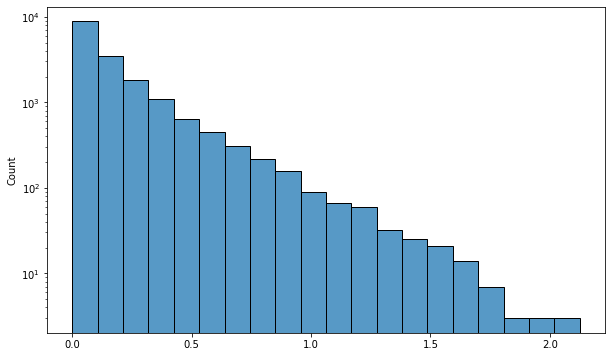

In [13]:
# 10 epochs 
plt.figure(figsize=(10,6))
sns.histplot(abs(y_test_1-y_pred_model4.flatten()),bins=20)
plt.yscale("log")

In [20]:
difference = abs(y_test_1-y_pred_model4.flatten())
print('MAE less than "0.1"',np.array(np.where(difference<=0.1)).flatten().shape)
print('MAE less than "0.2"',np.array(np.where( (difference>0.1) & (difference<=0.2) ) ).flatten().shape)
print('MAE less than "0.5"',np.array(np.where(difference<=0.5)).flatten().shape)
print('MAE greater than "0.5" but less than "1"',np.array(np.where( (difference<=1) &(difference>0.5) )).flatten().shape)
print('MAE greater than "1" but less than "1.5"',np.array(np.where( (difference<=1.5) &(difference>1) )).flatten().shape)
print('MAE greater than "1.5" but less than "2"',np.array(np.where( (difference<=2) &(difference>1.5) )).flatten().shape)
print('MAE greater than "2" but less than',max(difference),np.array(np.where( (difference<=max(difference)) &(difference>2) )).flatten().shape)

MAE less than "0.1" (8529,)
MAE less than "0.2" (3492,)
MAE less than "0.5" (15687,)
MAE greater than "0.5" but less than "1" (1320,)
MAE greater than "1" but less than "1.5" (231,)
MAE greater than "1.5" but less than "2" (45,)
MAE greater than "2" but less than 2.125365671155365 (5,)


In [21]:
len(x_test_1)

17288

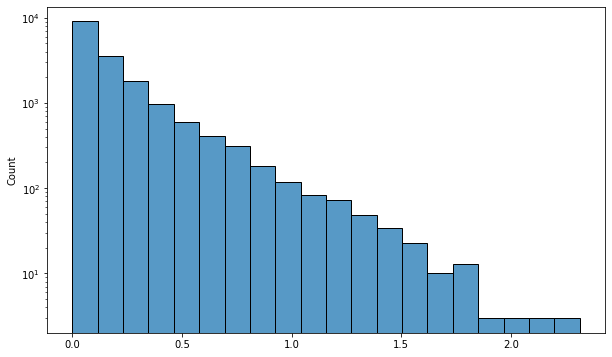

In [28]:
# 10 epochs 
plt.figure(figsize=(10,6))
sns.histplot(abs(y_test_1-y_pred_model3.flatten()),bins=20)
plt.yscale("log")

In [29]:
difference = abs(y_test_1-y_pred_model3.flatten())
print('MAE less than "0.1"',np.array(np.where(difference<=0.1)).flatten().shape)
print('MAE less than "0.5"',np.array(np.where(difference<=0.5)).flatten().shape)
print('MAE greater than "0.5" but less than "1"',np.array(np.where( (difference<=1) &(difference>0.5) )).flatten().shape)
print('MAE greater than "1" but less than "1.5"',np.array(np.where( (difference<=1.5) &(difference>1) )).flatten().shape)
print('MAE greater than "1.5" but less than "2"',np.array(np.where( (difference<=2) &(difference>1.5) )).flatten().shape)
print('MAE greater than "2" but less than',max(difference),np.array(np.where( (difference<=max(difference)) &(difference>2) )).flatten().shape)

MAE less than "0.1" (8204,)
MAE less than "0.5" (15589,)
MAE greater than "0.5" but less than "1" (1356,)
MAE greater than "1" but less than "1.5" (284,)
MAE greater than "1.5" but less than "2" (50,)
MAE greater than "2" but less than 2.313222867381775 (9,)


## Tesing Old Model 

In [8]:
testing = keras.models.load_model('Cnn_regression_4thModel')
testing.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 160)       4160      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 160)      0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 14, 14, 160)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 10, 10, 160)       640160    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 160)        0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 5, 5, 160)       

In [12]:
testing.evaluate(images10_AA_D,target10_AA_D)

303/303 [==============================] - 18s 57ms/step - loss: 0.5768 - mean_squared_error: 0.5461


[0.5767677426338196, 0.5460764169692993]

In [14]:
testing.evaluate(images10_1948,target10_1948)

555/555 [==============================] - 31s 55ms/step - loss: 0.4125 - mean_squared_error: 0.2900


[0.41254228353500366, 0.2899544835090637]

In [17]:
testing.evaluate(images10__1952,target10_1952)

171/171 [==============================] - 10s 58ms/step - loss: 0.4627 - mean_squared_error: 0.3243


[0.46267077326774597, 0.3243071436882019]

# Keras Tuner 

In [9]:
def hyper_model(hp):
    model = keras.Sequential([
    keras.layers.Conv2D( filters=hp.Int('conv_1_filter', min_value=32, max_value=192, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
        
    keras.layers.Conv2D( filters=hp.Int('conv_2_filter', min_value=32, max_value=192, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
        
              
    keras.layers.Flatten(),
      
    keras.layers.Dense(units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),activation='relu'),
    keras.layers.Dense(units=hp.Int('dense_2_units', min_value=32, max_value=256, step=16),activation='relu'),
    keras.layers.Dense(units=hp.Int('dense_3_units', min_value=32, max_value=256, step=16),activation='relu'),

    keras.layers.Dense(1, activation='relu')])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.mean_absolute_error,
              metrics= keras.metrics.mean_absolute_error)
    return model

In [10]:
best_model = RandomSearch(hyper_model,objective='mean_absolute_error',max_trials = 20, directory = 'hyperparameter_models',project_name='New_data10_Regression')

INFO:tensorflow:Reloading Oracle from existing project hyperparameter_models\New_data10_Regression\oracle.json
INFO:tensorflow:Reloading Tuner from hyperparameter_models\New_data10_Regression\tuner0.json


In [70]:
# dont run this 
best_model.search(x_train_1,y_train_1,epochs=5,validation_data=(x_test_1,y_test_1))

Trial 20 Complete [00h 30m 44s]
mean_absolute_error: 0.30480682849884033

Best mean_absolute_error So Far: 0.27609992027282715
Total elapsed time: 07h 59m 10s
INFO:tensorflow:Oracle triggered exit


In [119]:
best_model.get_best_hyperparameters()

{}

In [127]:
best_hp = best_model.get_best_hyperparameters()[0]
best_hp.values

{'conv_1_filter': 96,
 'conv_1_kernel': 5,
 'conv_2_filter': 176,
 'conv_2_kernel': 3,
 'dense_1_units': 240,
 'dense_2_units': 160,
 'dense_3_units': 176}

In [12]:
model = best_model.get_best_models()[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 96)        2496      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 176)       152240    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 176)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 176)         0

In [32]:
model.fit(x_train_1,y_train_1,epochs=10,initial_epoch=5)

Epoch 6/10
2161/2161 [==============================] - 228s 105ms/step - loss: 0.2650 - mean_absolute_error: 0.2650
Epoch 7/10
2161/2161 [==============================] - 231s 107ms/step - loss: 0.2508 - mean_absolute_error: 0.2508
Epoch 8/10
2161/2161 [==============================] - 210s 97ms/step - loss: 0.2381 - mean_absolute_error: 0.2381
Epoch 9/10
2161/2161 [==============================] - 237s 110ms/step - loss: 0.2296 - mean_absolute_error: 0.2296
Epoch 10/10
2161/2161 [==============================] - 246s 114ms/step - loss: 0.2225 - mean_absolute_error: 0.2225


In [33]:
model.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 15s 27ms/step - loss: 0.2200 - mean_absolute_error: 0.2200 1s - loss: 0.2204 - mean_absolute_err - ETA: 0s - loss: 0.2202 - mean_absolute_error:


[0.22002427279949188, 0.22002427279949188]

In [81]:
model.fit(x_train_1,y_train_1,epochs=20,initial_epoch=10)

Epoch 11/20
2161/2161 [==============================] - 256s 119ms/step - loss: 0.2138 - mean_absolute_error: 0.2138
Epoch 12/20
2161/2161 [==============================] - 248s 115ms/step - loss: 0.2068 - mean_absolute_error: 0.2068
Epoch 13/20
2161/2161 [==============================] - 250s 115ms/step - loss: 0.2012 - mean_absolute_error: 0.2012
Epoch 14/20
2161/2161 [==============================] - 257s 119ms/step - loss: 0.1957 - mean_absolute_error: 0.1957
Epoch 15/20
2161/2161 [==============================] - 249s 115ms/step - loss: 0.1906 - mean_absolute_error: 0.1906
Epoch 16/20
2161/2161 [==============================] - 249s 115ms/step - loss: 0.1873 - mean_absolute_error: 0.1873
Epoch 17/20
2161/2161 [==============================] - 248s 115ms/step - loss: 0.1835 - mean_absolute_error: 0.1835
Epoch 18/20
2161/2161 [==============================] - 250s 116ms/step - loss: 0.1796 - mean_absolute_error: 0.1796
Epoch 19/20
2161/2161 [==============================] -

In [82]:
model.evaluate(x_test_1,y_test_1)

541/541 [==============================] - 15s 28ms/step - loss: 0.1967 - mean_absolute_error: 0.1967


[0.19668778777122498, 0.19668778777122498]

In [83]:
y_pred_model = model.predict(x_test_1)
y_pred_model

array([[0.7763894],
       [2.5953267],
       [1.9186721],
       ...,
       [1.5931907],
       [1.7627265],
       [1.8780205]], dtype=float32)

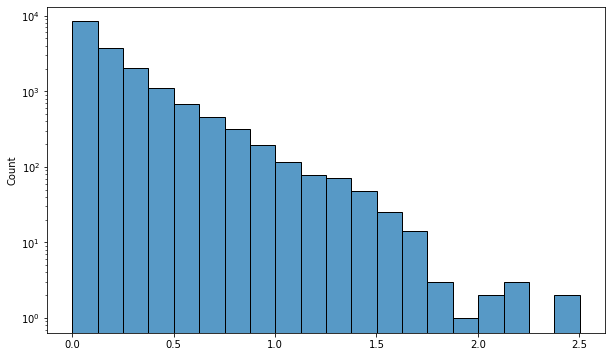

In [49]:
# 10 epochs 
plt.figure(figsize=(10,6))
sns.histplot(abs(y_test_1-y_pred_model.flatten()),bins=20)
plt.yscale("log")

In [59]:
len(y_test_1)

17288

In [80]:
# 10 epochs
print('MAE less than "0.1"',np.array(np.where(difference<=0.1)).flatten().shape)
print('MAE less than "0.5"',np.array(np.where(difference<=0.5)).flatten().shape)
print('MAE greater than "0.5" but less than "1"',np.array(np.where( (difference<=1) &(difference>0.5) )).flatten().shape)
print('MAE greater than "1" but less than "1.5"',np.array(np.where( (difference<=1.5) &(difference>1) )).flatten().shape)
print('MAE greater than "1.5" but less than "2"',np.array(np.where( (difference<=2) &(difference>1.5) )).flatten().shape)
print('MAE greater than "2" but less than "3"',np.array(np.where( (difference<=3) &(difference>2) )).flatten().shape)

MAE less than "0.1" (12199,)
MAE less than "0.5" (16165,)
MAE greater than "0.5" but less than "1" (892,)
MAE greater than "1" but less than "1.5" (193,)
MAE greater than "1.5" but less than "2" (33,)
MAE greater than "2" but less than "3" (5,)


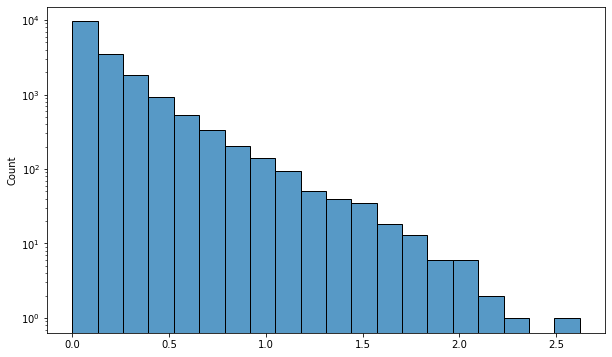

In [84]:
# 20 epochs 
# 10 epochs 
plt.figure(figsize=(10,6))
sns.histplot(abs(y_test_1-y_pred_model.flatten()),bins=20)
plt.yscale("log")

In [85]:
# 20 Epochs

print('MAE less than "0.1"',np.array(np.where(difference<=0.1)).flatten().shape)
print('MAE less than "0.5"',np.array(np.where(difference<=0.5)).flatten().shape)
print('MAE greater than "0.5" but less than "1"',np.array(np.where( (difference<=1) &(difference>0.5) )).flatten().shape)
print('MAE greater than "1" but less than "1.5"',np.array(np.where( (difference<=1.5) &(difference>1) )).flatten().shape)
print('MAE greater than "1.5" but less than "2"',np.array(np.where( (difference<=2) &(difference>1.5) )).flatten().shape)
print('MAE greater than "2" but less than "3"',np.array(np.where( (difference<=3) &(difference>2) )).flatten().shape)

MAE less than "0.1" (12199,)
MAE less than "0.5" (16165,)
MAE greater than "0.5" but less than "1" (892,)
MAE greater than "1" but less than "1.5" (193,)
MAE greater than "1.5" but less than "2" (33,)
MAE greater than "2" but less than "3" (5,)
